In [73]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct 

## Get data from pyboard
NOTE: you will need to modify `<port>` in the following line to work with your operating system (see lab1.py for instructions)

In [74]:
data_txt = !python pyboard.py --device COM5 lab_2.py 
data = np.loadtxt(data_txt) # convert text stream to numpy array

### Run the following cell if you want to save the data to a text file

In [75]:
filename = 'data.csv' # change filename here to save multiple data files
np.savetxt(filename, data) # save numpy array to text file

### Run the following cell to load data from a text file.

In [76]:
data = np.loadtxt(filename) # load text file into numpy array

### Plot

90
0.442
Average of input signal magnitude:  1.1195
Average of filtered output signal magnitude:  0.9695
Ratio of magnitudes: 0.866


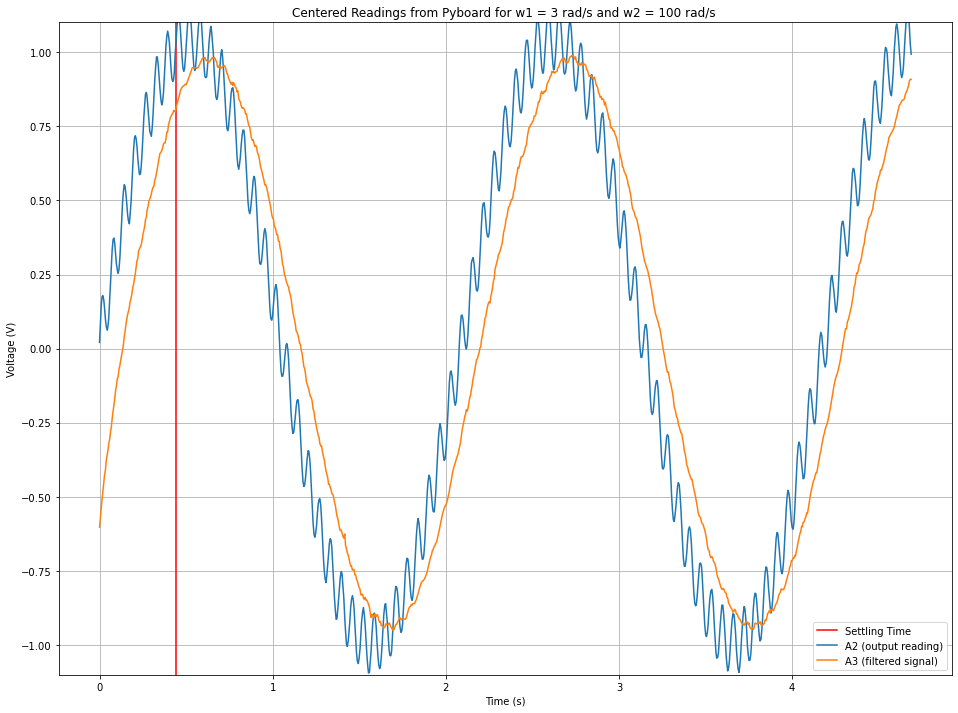

In [77]:
# extract data colums
t = data[:,0]
A0_V = data[:,1] - 1.5
A2_V = data[:,2] - 1.5
A3_V = data[:,3] - 1.5
plt.figure(figsize=(16, 12)) 

for i in range(0,len(t)):
    t_val = t[i]
    if t_val >= 0.44:
        index = i
        break
    else:
        pass
    
print(index)
print(t[index])

input_mag = (abs(max(A2_V[index:])) + abs(min(A2_V[index:])))/2

mag = (abs(max(A3_V[index:])) + abs(min(A3_V[index:])))/2
print("Average of input signal magnitude: ", round(input_mag,4))
print("Average of filtered output signal magnitude: ", round(mag,4))

print(f"Ratio of magnitudes: {round(mag/input_mag,4)}")

vert_line = np.linspace(-1.1,1.1,100)
settling_time = 0.44*np.ones(len(vert_line))
plt.plot(settling_time, vert_line, "red")

hor_line = 1.5*np.ones(len(t))
# plt.plot(t,hor_line, color="black")

plt.plot(t, A2_V, t, A3_V)
plt.xlabel('Time (s)') 
plt.ylabel('Voltage (V)') 
plt.legend(('Settling Time','A2 (output reading)','A3 (filtered signal)'))
plt.grid()
plt.title("Centered Readings from Pyboard for w1 = 3 rad/s and w2 = 100 rad/s ")
# other useful commands: 
plt.ylim(-1.1,1.1) # adjust vertical range of plot
plt.savefig('response_to_noise.jpg'); # save figure as a pdf. 
# print(max(data)) # print maximum value of data
# function? to get help on a specific function named "function"
# print(f"Average Voltage:{np.mean(A2_V)} ")